In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dynesty
log2pi = np.log(2*np.pi)

Setting rcParams['ps.usedistiller'] requires ghostscript.


In [2]:
#Load data needed to fit
img, weight, pre_rendered_comp, ub,lb = np.load('data_to_run.npy', allow_pickle = True)
sum_log_weight = np.sum(np.log(weight[weight!=0]))
ndim = ub.shape[0]

In [3]:
#Set up tilted-plane sky model
x_pix = np.arange(0,img.shape[0])
y_pix = np.arange(0,img.shape[1])
X,Y = np.meshgrid(x_pix,y_pix, indexing = 'ij')

X = X -img.shape[0]/2.
Y = Y - img.shape[1]/2.

def sky(sky_params ):
    a,b,c = sky_params
    return a + X*b + Y*c

def log_like(params):
        
        #Calculate model by summing together pre-rendered components
        final_a = 10**(params[:-3])
        model = np.sum(final_a*pre_rendered_comp, axis = -1)
        
        #Add sky model
        model += sky(params[-3:])

        return -0.5*np.sum( (img - model)**2 *weight  + log2pi ) + 0.5*sum_log_weight

def ptform(u):
    #Uniform priors for all fluxes and sky
    return u*(ub - lb) + lb

In [ ]:
sampler = dynesty.DynamicNestedSampler( log_like, ptform, ndim= ndim, bound='multi',)
sampler.run_nested(wt_kwargs = {'pfrac':0.8},stop_kwargs = {'pfrac': 0.8},maxbatch = 15)

3008it [00:55, 32.92it/s, batch: 0 | bound: 16 | nc: 25 | ncall: 46977 | eff(%):  6.336 | loglstar:   -inf < 19199.526 <    inf | logz: 19186.642 +/-  0.226 | dlogz: 7154.667 >  0.010]   

In [ ]:
sampler1 = dynesty.DynamicNestedSampler( log_like, ptform, ndim= ndim, bound='multi',)
sampler1.run_nested(wt_kwargs = {'pfrac':0.8},stop_kwargs = {'pfrac': 0.8},maxbatch = 15)

In [ ]:
sampler2 = dynesty.DynamicNestedSampler( log_like, ptform, ndim= ndim, bound='multi',)
sampler2.run_nested(wt_kwargs = {'pfrac':0.8},stop_kwargs = {'pfrac': 0.8},maxbatch = 15)

In [34]:
sampler.results.logz[-1], sampler.results.logzerr[-1],sampler1.results.logz[-1],sampler2.results.logz[-1]

(26960.71231889128,
 0.37757956988159275,
 26962.706014821335,
 26962.756235988934)

In [27]:
import copy
#Work around because the Evidence is so large it seemed to break the matplotlib limits
res_to_plot = copy.deepcopy(sampler.results)
res_to_plot['logz'] = res_to_plot['logz']-26900
res_to_plot['logwt'] = res_to_plot['logwt']-26900


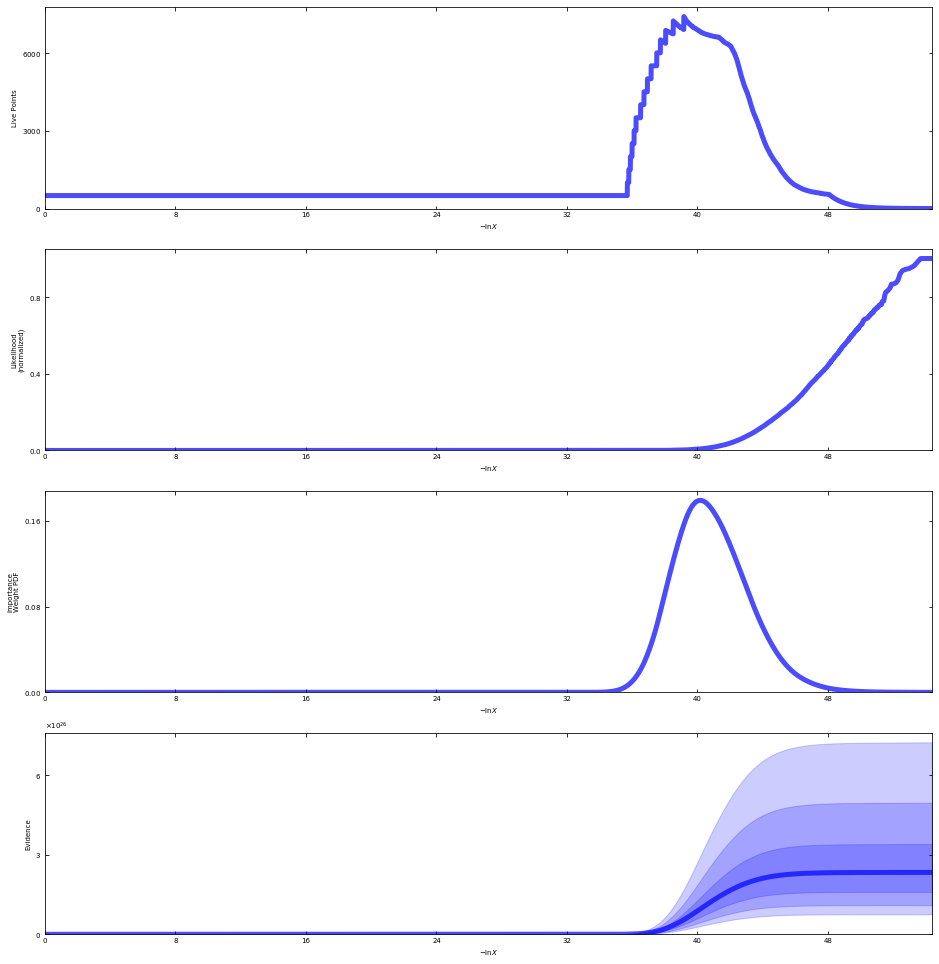

In [38]:
fig, axes = dyplot.runplot(res_to_plot)
plt.savefig('run_plot_test.png',bbox_inches = 'tight')
plt.show()

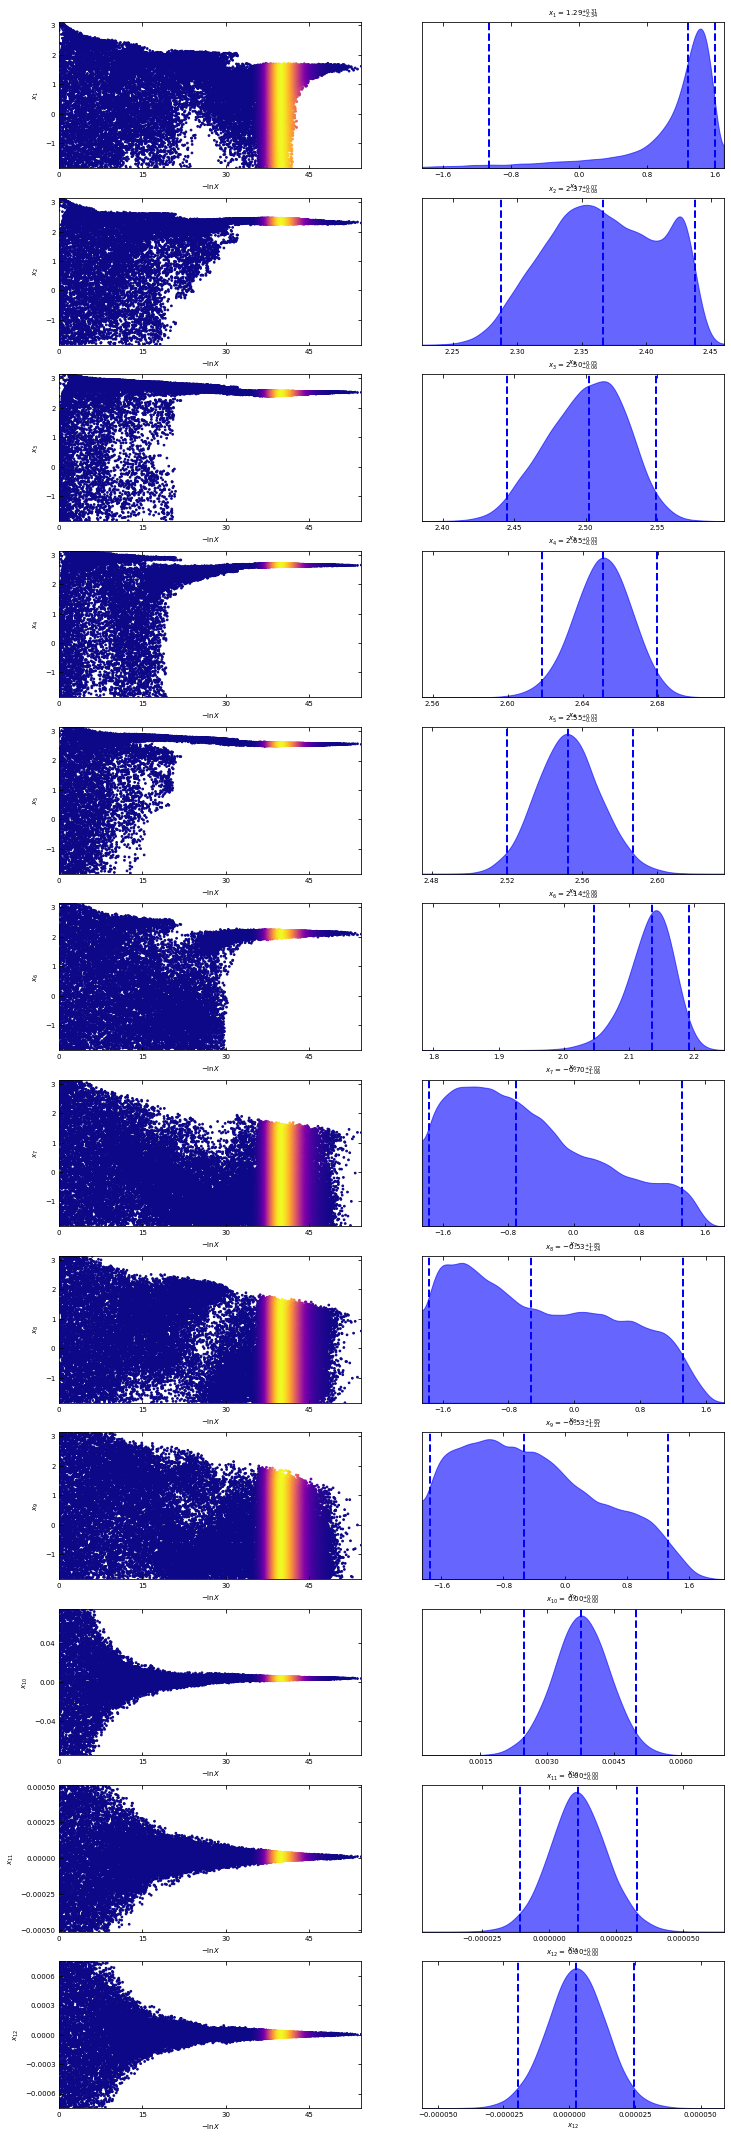

In [39]:
fig, axes = dyplot.traceplot(res_to_plot, show_titles=True)
plt.savefig('trace_plot_test.png',bbox_inches = 'tight')
plt.show()

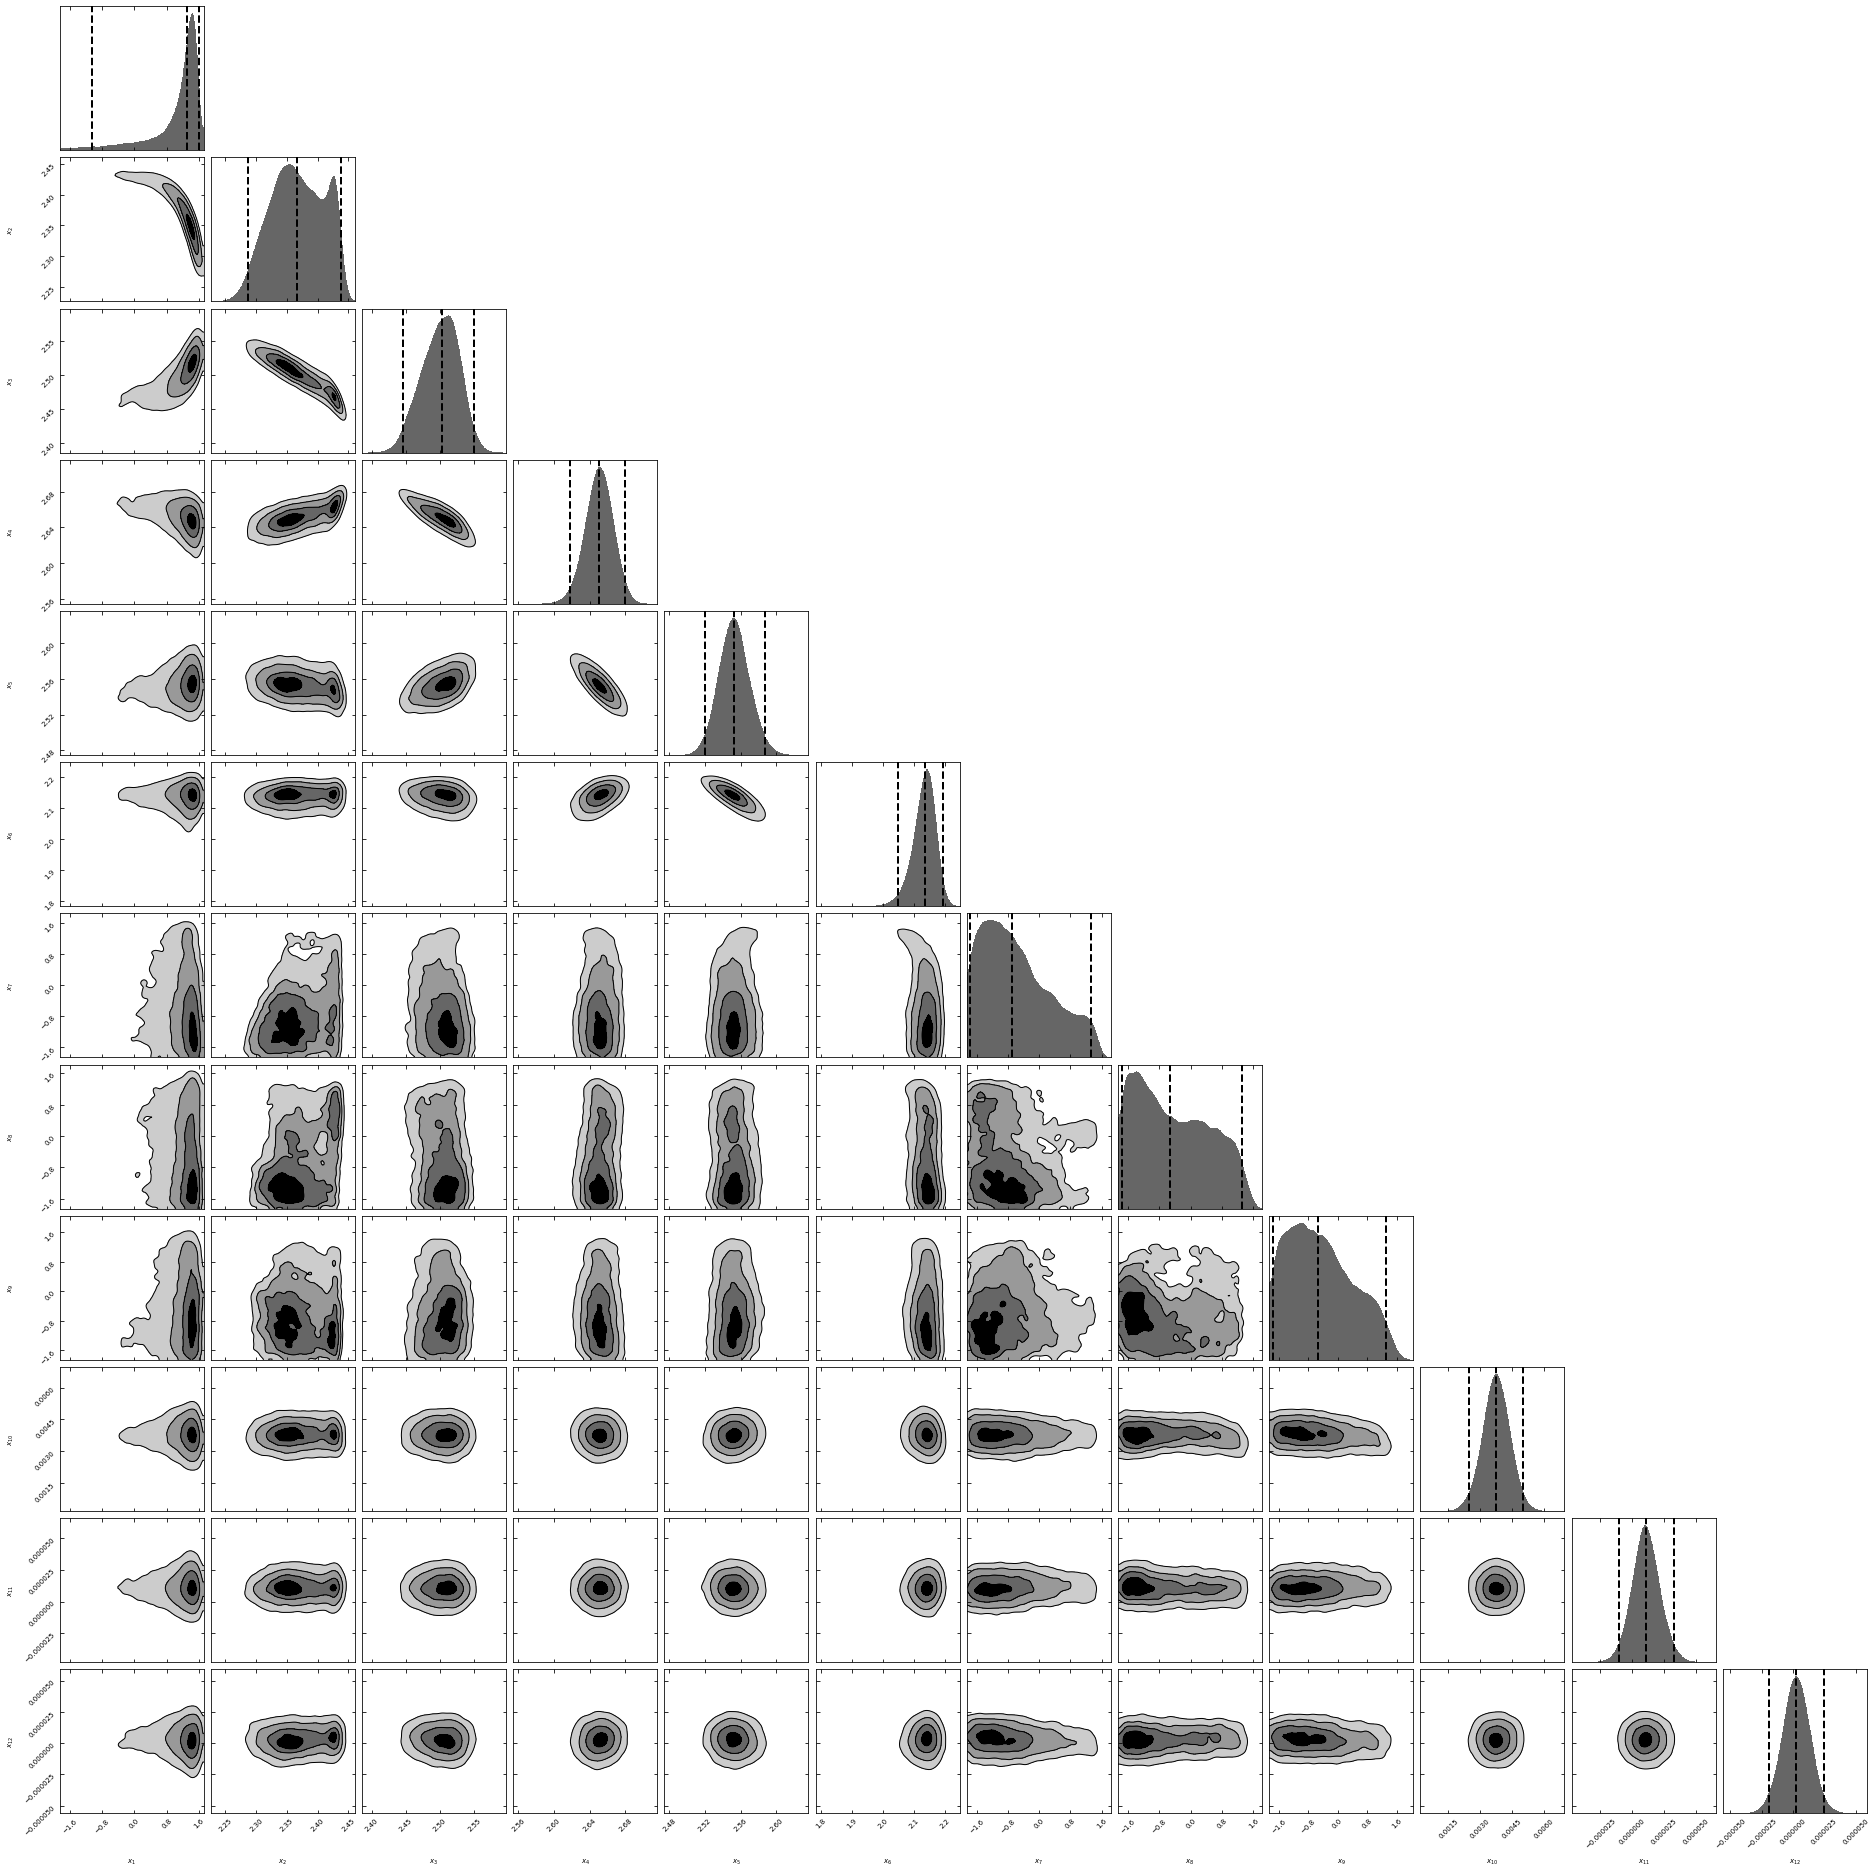

In [40]:
fig, ax = dyplot.cornerplot(res_to_plot)
plt.savefig('corner_plot_test.png',bbox_inches = 'tight')
plt.show()